# This is an example of a Polynomial curve fitting example

Loading helper code/generate uniform data

In [2]:
import numpy as np
import math

Defining a function- generateUniformData

In [13]:

def generateUniformData(N,l,u,gVar):  #pass these variables in it- N,l,u,gVar
    '''generate a function generateUniformdata which has N uniformaly spaced samples in the range [l,u], 
        with random Gaussian noise which has mean zero and standard deviation gVar'''
    #x = np.random.uniform(l,u,N) 
    #not using the above line for x as it gives a uniform distribution in l,u
    
    step = (u-l)/(N)
    x = np.arange(l+step/2, u+step/2, step) 
    #np.arange will return evenly spaced values within a given interval
    #this is in a half open interval, includes the starting value but excludes the ending value
    
    e = np.random.normal(0, gVar, N) #np.random.normal will draw random samples from a Gaussian(normal) distribution
    #np.random.normal(loc, scale, size)- loc is mean, scale is std. deviation
    
    t = np.sin(2*math.pi*x) + e #this is our target value
    
    return x,t
    

Plotting the data points
Defining the plotData function

In [19]:
import matplotlib.pyplot as plt

#defining a function to plot the data and the underlying true function

def plotData(x1,t1, x2,t2, x3 = None, t3 = None, legend = []):
  #plotting everything now
    #plotting the training data
    p1 = plt.plot(x1, t1, 'bo')
    #plotting the true data
    p2 = plt.plot(x2, t2, 'g') 
    if (x3 is not None):
       p3 = plt.plot(x3, t3, 'r')
    
    #Adding the title, legend and axes 
    #xlabel
    plt.xlabel('training values (x)')
    plt.ylabel('true values (t)')    
    
    if(x3 is None):
        plt.legend((p1[0], p2[0]), legend)
    else:
        plt.legend((p1[0], p2[0], p3[0]),legend)


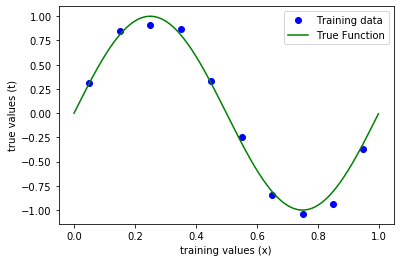

In [21]:
import matplotlib.pyplot as plt
import textwrap 
%matplotlib inline  

#predefined magic function that lets your plot appear and be stored in the notebook

l = 0
u= 1
gVar = 0.1
N = 10

uniformdata = np.array(generateUniformData(N, l, u, gVar)).T
#np.array - this will generate an array
#the .T is for transpose 

x1 = uniformdata[: , 0] #take all elements of row, and first of column
t1 = uniformdata[:, 1] #take all elements of row and second element of column

x2 = np.arange (l, u, 0.001)
#will have equally spaced points in the range 
#np.arrange will return evenly spaced values within a given interval
t2 = np.sin(2*math.pi*x2)  #calculate the value of true function

fig = plt.figure()  
#will create a new figure
plotData(x1, t1, x2, t2, legend = ['Training data', 'True Function'])




Now using Polynomial curve fitting to fit the data

array([ -0.28227157,  12.77767326, -36.45102463,  24.10351916])

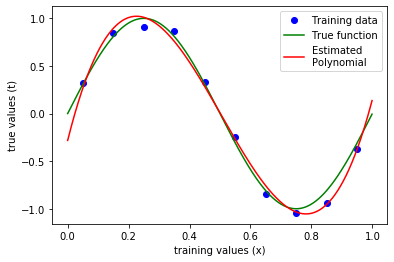

In [22]:
#Making a function fitdata where we will pass the training value, the true function and M is the order of the data
def fitdata(x,t, M):
    '''fitdata(x,t, M) will fit a polynomial of order M to the data (x,t)'''
    #making the big X matrix with all the values of x see the Explanation
    X = np.array([x**m for m in range(M+1)]).T
    # ** is for exponentiation
    # .T is for transpose
    #defining the weights (see Explanation)
    w = np.linalg.inv(X.T@X)@X.T@t  
    #the @ (overload operator) is used for matrix multiplication #matmul can also be used 
    #numpy.linalg.inv(a)[source] 
    #computing the multiplicative inverse of a matrix 
    return w 

# Input the order of M, that will not overfit the data and will be optimum
M = 3 #we try the order as 3, this should give us a good fit
w = fitdata(x1, t1, M)
xrange = np.arange(l, u, 0.001) #get equally spaced points
X = np.array([xrange**m for m in range(w.size)]).T

#now we will compute the predicted value by multiplying the matrices X and w
estimatedy = X@w 
plotData(x1, t1, x2, t2, xrange, estimatedy, ['Training data', 'True function', 'Estimated\nPolynomial']) 
#the xrange is x3  and estimatedy is t3
w